Makes an assumption that regular data comes from a normal distribution. It works by fitting an elliptical shape around the data points and any point outside the envelope is classified as an anamoly.


**Reference**: Rousseeuw, P.J., Van Driessen, K. “A fast algorithm for the minimum covariance determinant estimator” Technometrics 41(3), 212 (1999)

In [1]:
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs
from sklearn.covariance import EllipticEnvelope

**Make simulated dataset**

In [15]:
X, _ = make_blobs(n_samples=300, n_features=2, centers=1, shuffle=True, random_state=42)
df_X = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df_X.head()



,feature_1,feature_2
0,-2.182270,8.795186
1,-1.761904,9.624656
2,-3.110904,10.866564
3,-2.395680,9.676417
4,-4.980842,8.217391


In [16]:
# contamination refers to what proportion of outliers are in the data set
ee = EllipticEnvelope(contamination=0.025, random_state=1) 
pred = ee.fit_predict(X)

In [18]:
df_X['label'] = pred

In [19]:
df_X['label'].value_counts()

 1    292
-1      8
Name: label, dtype: int64

In [20]:
df_X['label'] = np.where(df_X['label'] < 0, 0 , 1)

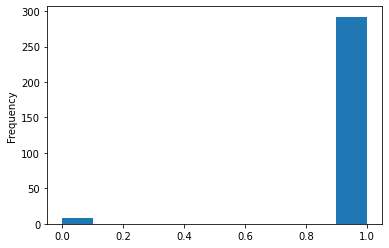

In [21]:
df_X['label'].plot(kind="hist")

In [23]:
outlier_points = df_X[df_X['label'] == 0]
normal_points = df_X[df_X['label'] == 1]

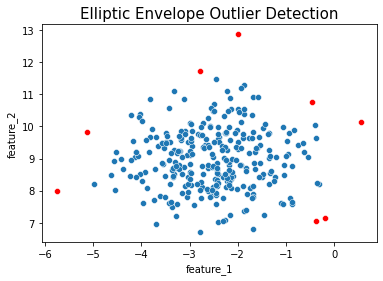

In [24]:
# Plot the data
import seaborn as sns

sns.scatterplot(x=normal_points['feature_1'], y=normal_points['feature_2'])
sns.scatterplot(x=outlier_points['feature_1'], y=outlier_points['feature_2'], color='r')
plt.title("Elliptic Envelope Outlier Detection", fontsize=15)
plt.savefig("Elliptic Envelope Detection.png", dpi=80)